In [1]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt

model=torch.load("./model.p", map_location='cpu') #LT
print("Loaded model.p")

import examples.mnist as M
import numpy as np


/Users/lucastian/miniconda3/envs/babyglot/lib/python3.6/site-packages/torch/serialization.py:425: SourceChangeWarning: source code of class 'helmholtz.WSR' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


got 100 instances
Loaded model.p


/Users/lucastian/miniconda3/envs/babyglot/lib/python3.6/site-packages/torch/serialization.py:425: SourceChangeWarning: source code of class 'examples.mnist.mnist.PxIID' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


memorized inference and test not too different, but test much more noisy - why?


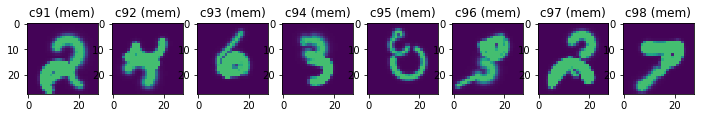

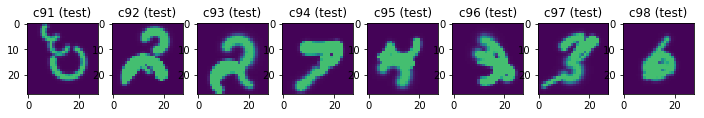

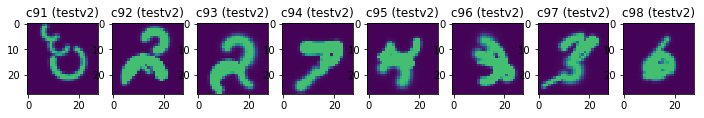

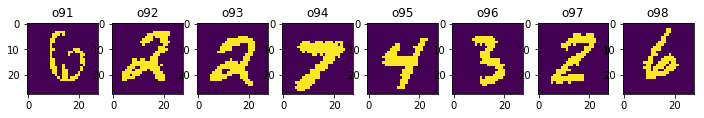

In [65]:
## ========= IMPORTANT 
# takes trained model, and given novel test characters, encodes them.
# Also decodes and plots
# Confirmed that the output is reasonable.

# NOTE:
# i doesn't affect output for model.decoder or model.encoder. DOES affect output for model.sample() - i.e. in that 
# will sample from the training samples currently memorized.
# noise and sample_probs as arguments in model.decoder and model.sample leads to identical rendered images. 
# SO: if want to encode and decode new images, use model.encoder and model.decoder.
# note: confirmed that the order of training samples doesn't matter 
doshuffle=True

#- is significnatly worse on test samples --> this is 
# due to overfitting? Yes confirmed.
dotrainset=False
# outcome: model.sample() would not be affected, since it only cares about "i", which I don't shuffle. the encode-->
# decode will be affected, but would still be fine.

## version 1 - any character (not just first 100)
# indtest = np.random.randint(1, 100, size=10)
# i= np.array(indtest)
# x = M.data[indtest]
# c, score = model.encoder(i,x)
# # decode
# x, score = model.decoder(i, c)

noisethis = 0

## version 2 - first 100 characters (trained)
indtest = np.arange(91, 99)
i= np.array(indtest)
if dotrainset is True:
    x = M.testdata[indtest]
else:
    x = M.data[indtest]
    
if doshuffle is True:
    x = x[torch.randperm(x.shape[0])]
xOrig = x

c, xMem = model.sample(i, x, noise=noisethis, sample_probs=True)
c, score = model.encoder(i, x)

xMem = [xx[0].detach() for xx in xMem]
xNovel, score = model.decoder(i, c, noise=noisethis, sample_probs=True)
xNovel = [xx[0].detach() for xx in xNovel]
xNovelv2, score = model.decoder(i, c, noise=noisethis, sample_probs=True)
xNovelv2 = [xx[0].detach() for xx in xNovelv2]
 
#     c, score = model.encoder(i, x)
#     x, score = model.decoder(i, c)
#     _, xMem = model.sample(i, x, noise=0.25, sample_probs=True)
    
#     xMem = [xx[0].detach() for xx in xMem]
#     xNovel = model.decoder(i, c)
    

        

# plot figures for decoded x
plt.figure(figsize=(15, 25))
for i, xx in enumerate(xMem):
    plt.subplot(1,10,i+1)
    plt.title('c%s (mem)' % indtest[i])
    plt.imshow(xx.numpy().reshape(28, 28), vmin=0, vmax=1)

plt.figure(figsize=(15, 25))
for i, xx in enumerate(xNovel):
    plt.subplot(1,10,i+1)
    plt.title('c%s (test)' % indtest[i])
    plt.imshow(xx.numpy().reshape(28, 28), vmin=0, vmax=1)   
    
plt.figure(figsize=(15, 25))
for i, xx in enumerate(xNovelv2):
    plt.subplot(1,10,i+1)
    plt.title('c%s (testv2)' % indtest[i])
    plt.imshow(xx.numpy().reshape(28, 28), vmin=0, vmax=1)    
 
plt.figure(figsize=(15, 25))
for ii, i in enumerate(indtest):
    # plot original
    plt.subplot(1, 10, ii+1)
    plt.title('o%s' % i)
    plt.imshow(xOrig[ii][0].numpy().reshape(28, 28), vmin=0, vmax=1)

    
print('memorized inference and test not too different, but test much more noisy - why?')


In [55]:
torch.randperm(x.shape[0])

tensor([3, 1, 6, 2, 4, 7, 5, 0])

In [ ]:
## the two methods of inference give same c?
indtest = np.arange(0, 9)
i= np.array(indtest)
x = M.data[indtest]

c1, score = model.encoder(i,x)
c2, xMem = model.sample(i, x, noise=0.25, sample_probs=True)

plt.figure()
plt.plot(c1[7], 'b')
plt.plot(c2[7], 'r')

In [ ]:
# ======== HISTOGRAMS OF PIXEL VALUES
plt.figure()
plt.hist(xMem[0])

plt.figure()
plt.hist(xNovel[0][0])

plt.figure()
plt.hist(M.data[0][0].numpy().reshape(28, 28))

In [ ]:
## ======== LOAD RAW DATA AND VISUALZE 
# NOT IMPORTANT - since the data object above does everything


data_numpy = np.fromfile("examples/mnist/data/binarized_mnist_train.amat", dtype=np.int16).reshape(-1,1,28,28)
data_numpy = np.fromfile("examples/mnist/data/binarized_mnist_test.amat", dtype=np.int16).reshape(-1,1,28,28)


data_numpy = np.fromfile("examples/mnist/data/binarized_mnist_train.amat", dtype=np.int16).reshape(-1,1,28,28)
# data_numpy = np.fromfile("examples/mnist/data/binarized_mnist_train.amat", dtype=np.int16)


data_numpy.shape

import matplotlib.pyplot as plt

plt.figure(figsize=(40, 40))
for j in range(20):
    plt.subplot(4, 5, j+1)
    plt.imshow(data_numpy[0+j][0]-8240, vmin=0, vmax=1)


Conditional log_probs for test example 0
Conditional log_probs for test example 1
Conditional log_probs for test example 2
Conditional log_probs for test example 3
Conditional log_probs for test example 4
Conditional log_probs for test example 5
Conditional log_probs for test example 6
Conditional log_probs for test example 7
Conditional log_probs for test example 8
Conditional log_probs for test example 9


NameError: name 'stats' is not defined

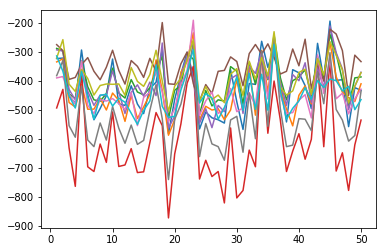

In [18]:
## ======== Log predictive probabilities

a = []
nway = 50

for j in range(10):
    print("Conditional log_probs for test example", j)
    M.imFromTensor(M.testdata[j, 0]).save("results/test-%d.png" % j)
    log_probs = model(i=np.arange(nway), x=M.testdata[j:j+1].repeat(nway, 1, 1, 1)) # calls model.forward
    #print(log_probs)
    a.append(log_probs.data.numpy())


a = [x.reshape(1,-1) for x in a]


a[2]

a = np.concatenate(a)

tmp = a.shape
tmp[1]
x = np.arange(1, tmp[1]+1)
x

plt.figure()
plt.plot(x, a.T)




# ======= ZSCORE WITHIN EACH SAMPLE (ROW)
a = stats.zscore(a, axis=1);
plt.figure(figsize=(15, 15))
plt.subplot(211)
plt.plot(x, a.T)

plt.subplot(212)
plt.imshow(a, vmin=-2, vmax=2, cmap='PuOr')
plt.colorbar()
# plt.colormaps('PuOr')



# ======== ANOTHER Z-SCORE IN OTHER AXIS.
b = stats.zscore(a, axis=0);
plt.figure(figsize=(15, 15))
plt.subplot(211)
plt.plot(x, b.T)

plt.subplot(212)
plt.imshow(b, vmin=-2, vmax=2, cmap='PuOr')
plt.colorbar()


In [ ]:
## ======= DO clustering on the predictive probabilities

# convert mixture components to array

z_all = [np.array(model.mixtureComponents[j][0]).reshape(1,-1) for j in range(len(model.mixtureComponents))]


z_all = np.concatenate(z_all)

plt.figure(figsize=(15, 15))
    
for i, p in enumerate((5, 10, 15, 20, 25, 30, 35)):
    from sklearn.manifold import TSNE
    X_embedded = TSNE(n_components=2, perplexity=p).fit_transform(z_all)
    
    plt.subplot(3,3,i+1)
    plt.plot(X_embedded[:,0], X_embedded[:,1], 'o')